In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in dataset
df_diabetes_binary = pd.read_csv('../data/raw/diabetes_binary_health_indicators_BRFSS2015.csv')

# Display first few rows
df_diabetes_binary.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Describe the shape of the dataset
rows, columns = df_diabetes_binary.shape
print(f"Number of rows: {rows} | Number of columns: {columns}")

Number of rows: 253680 | Number of columns: 22


In [4]:
# Print the data type of features
print(df_diabetes_binary.dtypes)

# TODO Convert data type of features respectively 
# -> task for PREPROCESSING 
# (e.g. to only have BMI, MentHlth, PhysHlth, Age as numerical [integer type] features, 
# GenHlth, Education, Income as ordinal/categorical (non-binary) [integer type] features/, 
# and remaining features as binary [integer type])

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [5]:
# Get more insights on the basic statistics
df_diabetes_binary.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
# Get information on missing data
missing_values = df_diabetes_binary.isnull().sum()
print(missing_values)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [7]:
# Get information on the standard deviation of features
df_diabetes_binary.std()


Diabetes_binary         0.346294
HighBP                  0.494934
HighChol                0.494210
CholCheck               0.189571
BMI                     6.608694
Smoker                  0.496761
Stroke                  0.197294
HeartDiseaseorAttack    0.292087
PhysActivity            0.429169
Fruits                  0.481639
Veggies                 0.391175
HvyAlcoholConsump       0.230302
AnyHealthcare           0.215759
NoDocbcCost             0.277654
GenHlth                 1.068477
MentHlth                7.412847
PhysHlth                8.717951
DiffWalk                0.374066
Sex                     0.496429
Age                     3.054220
Education               0.985774
Income                  2.071148
dtype: float64

In [8]:
# Get information on the variance of features
df_diabetes_binary.var()

Diabetes_binary          0.119920
HighBP                   0.244960
HighChol                 0.244243
CholCheck                0.035937
BMI                     43.674839
Smoker                   0.246771
Stroke                   0.038925
HeartDiseaseorAttack     0.085315
PhysActivity             0.184186
Fruits                   0.231976
Veggies                  0.153018
HvyAlcoholConsump        0.053039
AnyHealthcare            0.046552
NoDocbcCost              0.077091
GenHlth                  1.141644
MentHlth                54.950296
PhysHlth                76.002675
DiffWalk                 0.139925
Sex                      0.246442
Age                      9.328262
Education                0.971751
Income                   4.289652
dtype: float64

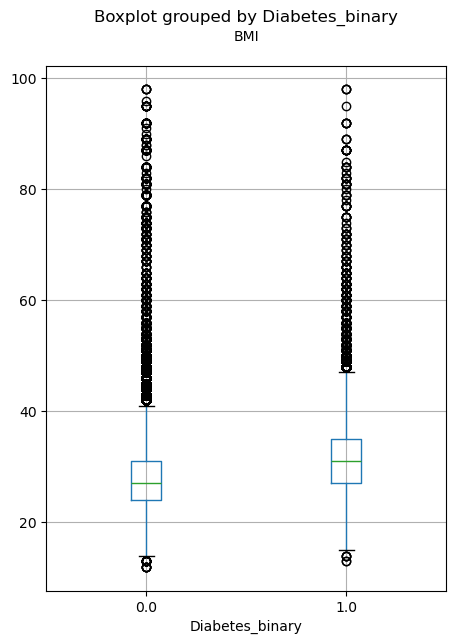

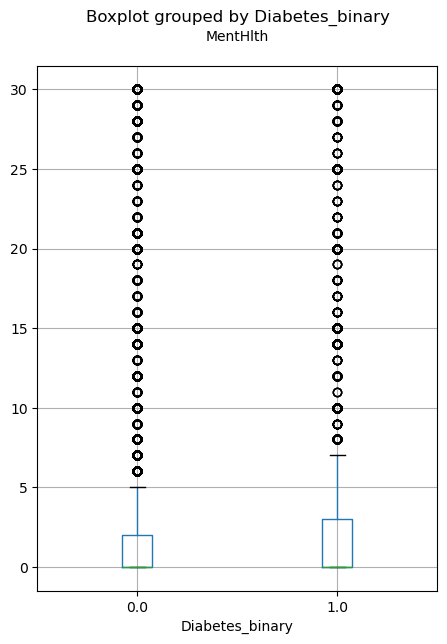

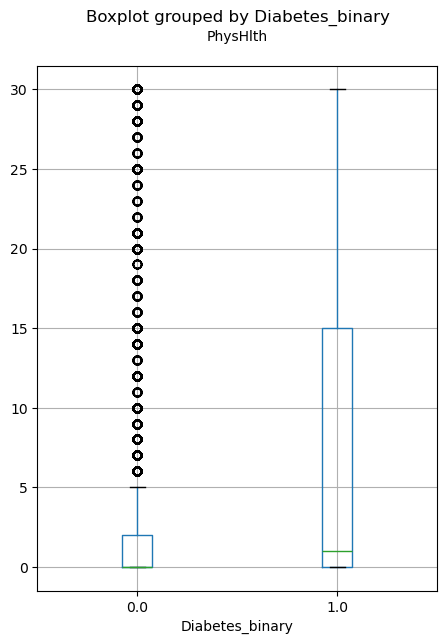

In [9]:
# Create boxplots for numerical features
boxplot_features = ['BMI', 'MentHlth', 'PhysHlth',]
for f in boxplot_features:
    df_diabetes_binary.boxplot(f,by='Diabetes_binary',figsize=(5,7),fontsize=10)
    plt.title("{}\n".format(f),fontsize=10)
    plt.xlabel("Diabetes_binary", fontsize=10)

#TODO Mental Health and Physical Health taken as numerical and Age taken as ordinal, is that ok? => because in Pre-processing habt ihr Age weiterhin als numerical aufgelistet

BMI         float64
MentHlth    float64
PhysHlth    float64
dtype: object


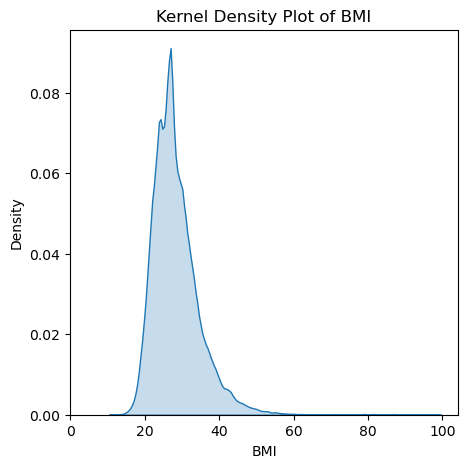

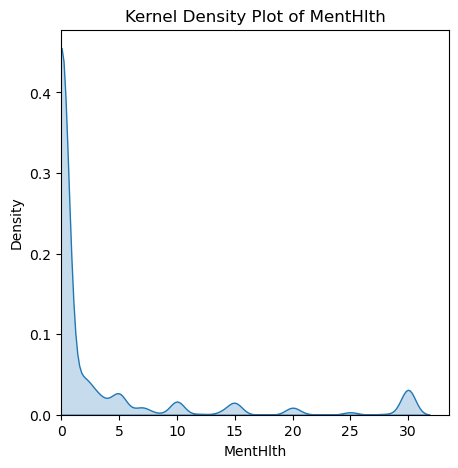

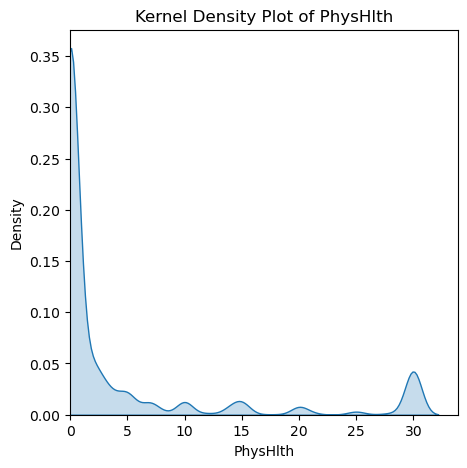

In [10]:
#Create kernel density plots for numerical features 
density_plot_features = ['BMI', 'MentHlth', 'PhysHlth',]

print(df_diabetes_binary[density_plot_features].dtypes)

for f in density_plot_features:
    plt.figure(figsize=(5, 5))
    sns.kdeplot(df_diabetes_binary[f], fill= True)
    plt.title(f'Kernel Density Plot of {f}')
    plt.xlabel(f)
    plt.ylabel('Density')
    plt.xlim(left=0)
    plt.show()

    #TODO Histogram -> physical and mental health and age und x-axis bei 0 anfangen
    #TODO Mental Health and Physical Health taken as numerical and Age taken as ordinal, is that ok?

BMI         float64
MentHlth    float64
PhysHlth    float64
dtype: object


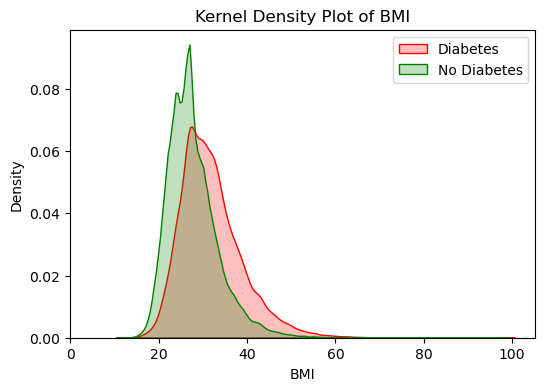

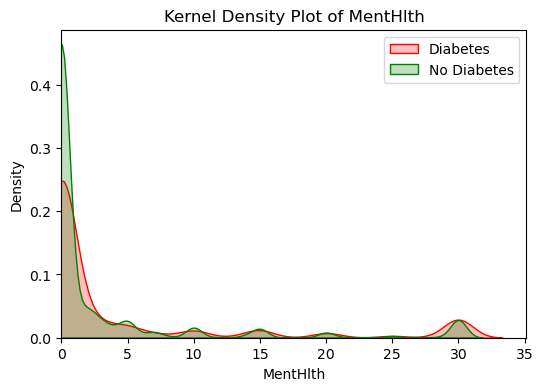

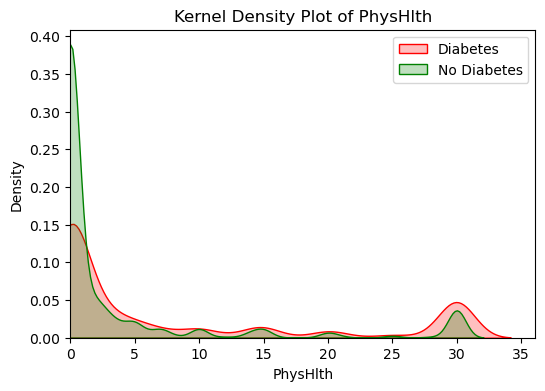

In [11]:
#Create kernel density plots for numerical features 
density_plot_features = ['BMI', 'MentHlth', 'PhysHlth',]

print(df_diabetes_binary[density_plot_features].dtypes)

for f in density_plot_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1.0][f], color='red', fill=True, label='Diabetes')
    sns.kdeplot(df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0.0][f], color='green', fill=True, label='No Diabetes')
    plt.title(f'Kernel Density Plot of {f}')
    plt.xlabel(f)
    plt.ylabel('Density')
    plt.xlim(left=0)
    plt.legend()
    plt.show()

#TODO Histogram -> physical and mental health and age und x-axis bei 0 anfangen
#TODO Mental Health and Physical Health taken as numerical and Age taken as ordinal, is that ok?

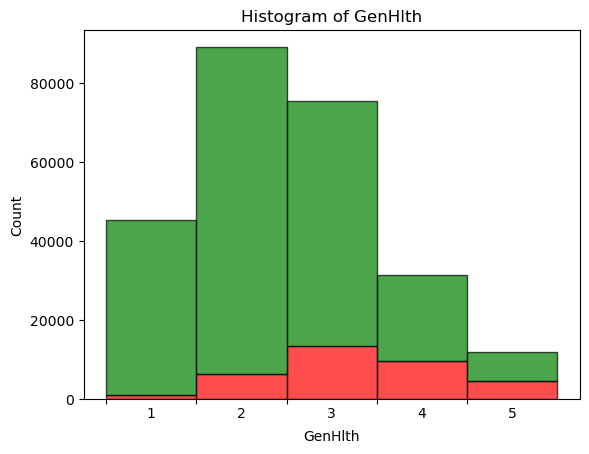

<Figure size 600x500 with 0 Axes>

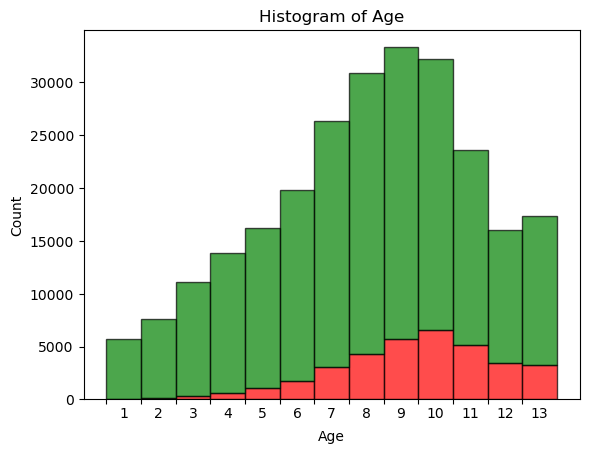

<Figure size 600x500 with 0 Axes>

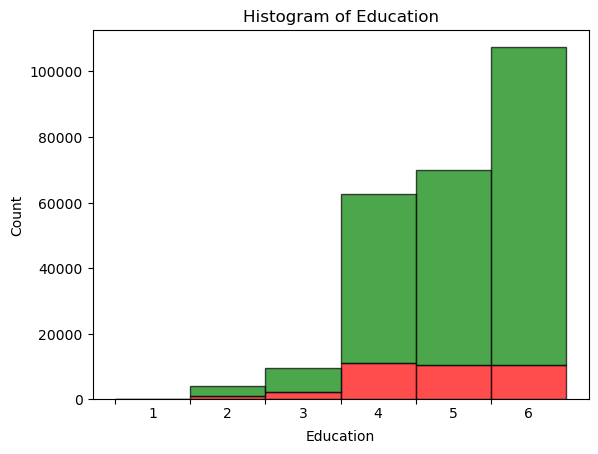

<Figure size 600x500 with 0 Axes>

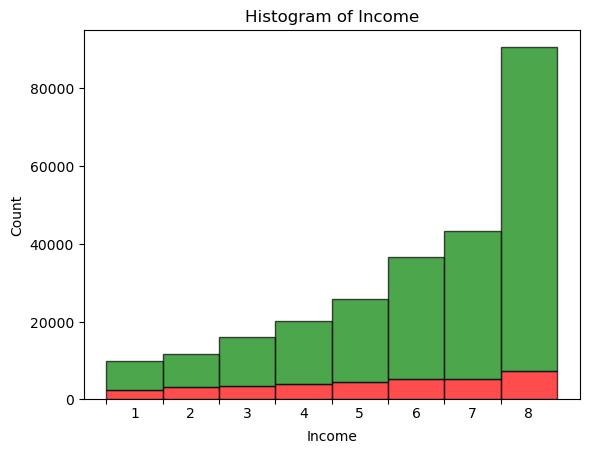

<Figure size 600x500 with 0 Axes>

In [12]:
# Create histograms for ordinal features
histogram_features = ['GenHlth','Age','Education', 'Income',]

# Code provided by ChatGPT after prompting with simple code and specifying adjustments:

# Loop through each feature in the list
for f in histogram_features:
    
    # Adjust bins to scale according to minimum and maximum values
    min_val = int(df_diabetes_binary[f].min())
    max_val = int(df_diabetes_binary[f].max()) + 1
    bins = np.arange(min_val, max_val + 1, 1)
    
    # Plot histograms for each Diabetes_binary class with colors and settings
    plt.hist([df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1.0][f],
              df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0.0][f]], 
             color=['red', 'green'], alpha=0.7, edgecolor='black', stacked=True, bins=bins)
    
    # Add title and labels with adjusted label position
    plt.title(f'Histogram of {f}', fontsize=12)
    plt.xlabel(f, labelpad=15)  # Increase labelpad to move x-axis label lower
    plt.ylabel('Count')
    
    # Set x-ticks at the start of each bin but without labels
    plt.xticks(bins[:-1], labels=[])

    # Add labels at the center of each bin
    for i in range(len(bins) - 1):
        label_position = (bins[i] + bins[i + 1]) / 2  # Center of each bin
        plt.text(label_position, -0.02 * plt.ylim()[1], str(int(bins[i])), ha='center', va='top', fontsize=10)
    
    # Show the plot
    plt.figure(figsize=(6, 5))
    plt.show()


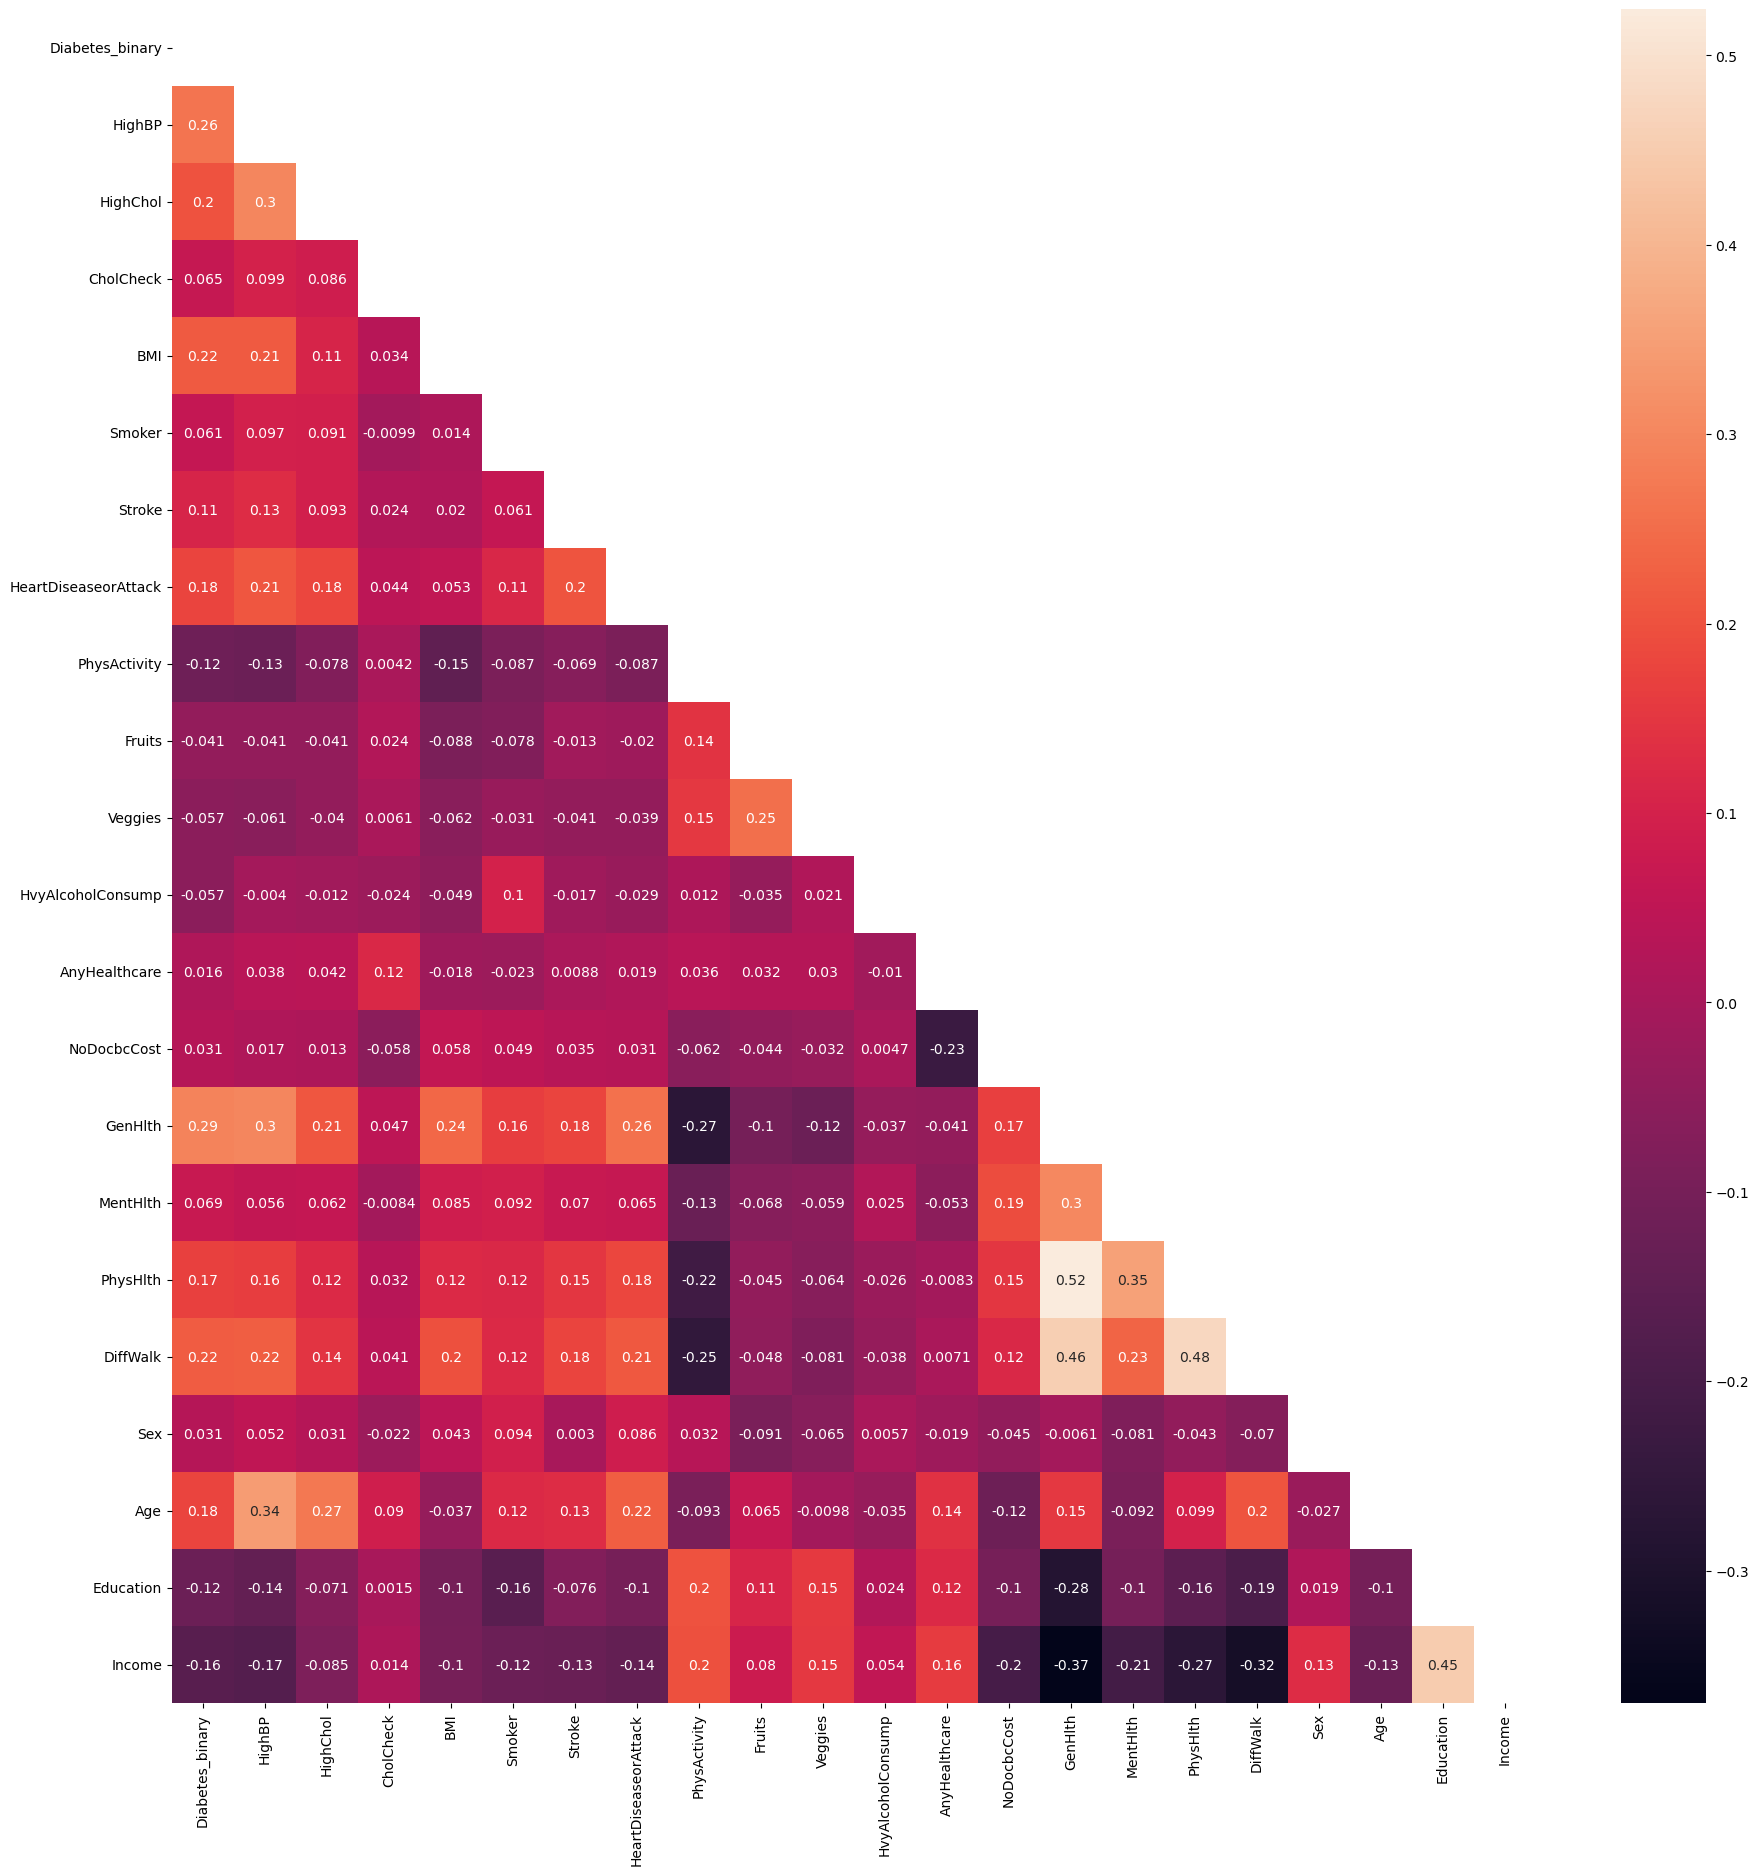

In [13]:
# Create correlation matrix but without redundant values
plt.figure(figsize=(22,22))
no_redundance = np.triu(df_diabetes_binary.corr())
sns.heatmap(df_diabetes_binary.corr(), mask= no_redundance, annot=True);

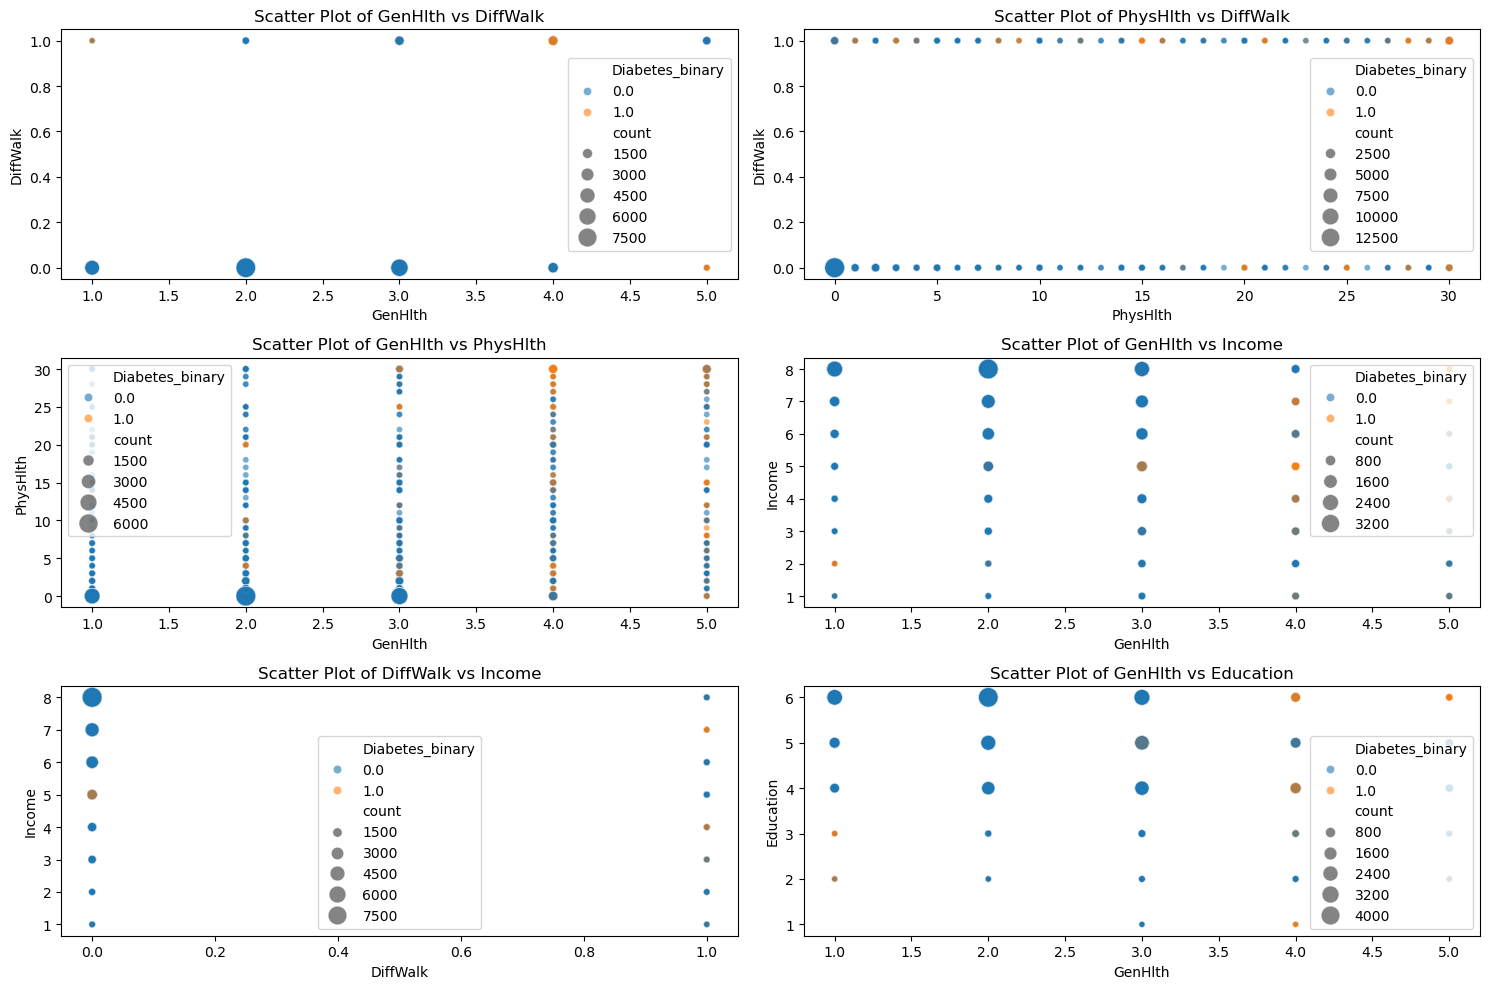

In [14]:
# Create pair plot/ scatterplot for three feature pairs with highest and lowest correlations to display multi-collinearity 

# Code provided by ChatGPT after prompting with simple code and specifying adjustments:

# Load the sample and correlation matrix
sampled_data = df_diabetes_binary.sample(frac=0.1)
correlation_matrix = sampled_data.corr()

# Identify the highest and lowest correlation pairs
# Flatten correlation matrix, filter out self-correlations, and get abs values to find top correlations
corr_pairs = correlation_matrix.unstack().drop_duplicates()
sorted_corr_pairs = corr_pairs[abs(corr_pairs) < 1].sort_values()

# Select top 3 positive and bottom 3 negative correlations
highest_corr_pairs = sorted_corr_pairs.tail(3).index
lowest_corr_pairs = sorted_corr_pairs.head(3).index

# Combine these into a list of selected pairs for plotting
selected_pairs = list(highest_corr_pairs) + list(lowest_corr_pairs)

# Initialize the plot with subplots for each pair
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Plot each pair with point sizes adjusted for counts
for i, (feature_x, feature_y) in enumerate(selected_pairs):
    # Group by feature_x and feature_y, count occurrences, and calculate sizes
    size_data = sampled_data.groupby([feature_x, feature_y]).size().reset_index(name='count')
    
    # Merge size data back to original sampled data for consistency
    merged_data = pd.merge(
        sampled_data, 
        size_data, 
        on=[feature_x, feature_y], 
        how='left'
    )
    
    # Create scatter plot with adjusted sizes
    sns.scatterplot(
        data=merged_data,
        x=feature_x,
        y=feature_y,
        hue="Diabetes_binary",
        size="count",
        sizes=(20, 200),  # Adjust point sizes (min, max)
        alpha=0.6,
        ax=axes[i]
    )
    axes[i].set_title(f'Scatter Plot of {feature_x} vs {feature_y}')

plt.tight_layout()
plt.show()

#TODO -> Aber nur auf sample data: Größe der Punkte darstellen bzw. anpassen anhand dessen wie viele in der jeweiligen Klasse sind


Imbalance Ratio: 6.18


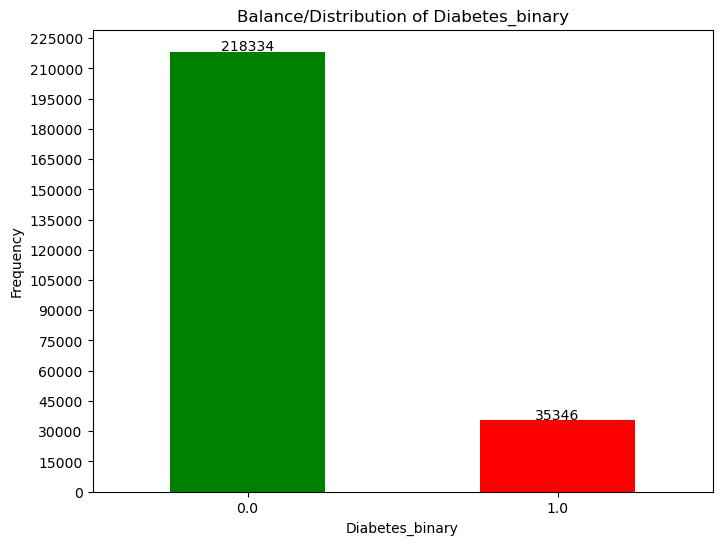

In [15]:
# Show balance/distribution within dataset Diabetes_binary

# Code provided by ChatGPT after giving instructions and details:

# Display class distribution of the target variable 'Diabetes_binary'
class_counts = df_diabetes_binary['Diabetes_binary'].value_counts()
class_counts_df = pd.DataFrame(class_counts).reset_index()
class_counts_df.columns = ['Class', 'Frequency']

# Calculate imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

# Set colors for the bars: green for class 0, red for class 1
colors = ['green' if class_label == 0 else 'red' for class_label in class_counts.index]

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=colors)

# Add labels at the top of each bar
for i, value in enumerate(class_counts):
    plt.text(i, value + 500, str(value), ha='center', fontsize=10)

# Customize the chart
plt.title("Balance/Distribution of Diabetes_binary")
plt.xlabel("Diabetes_binary")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

# Set y-axis ticks at intervals of 15000
plt.yticks(range(0, class_counts.max() + 15000, 15000))

plt.show()

#TODO Set y-axis ticks at intervals of 15000, or choose another interval?

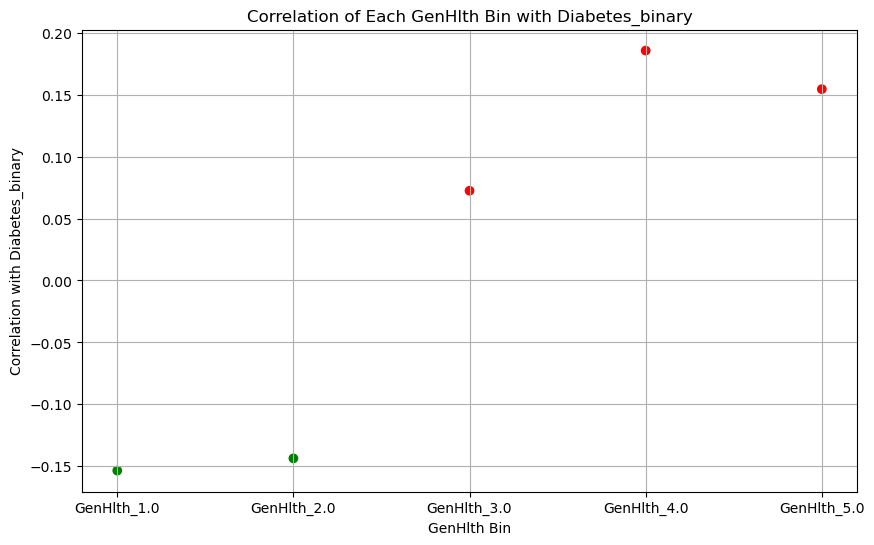

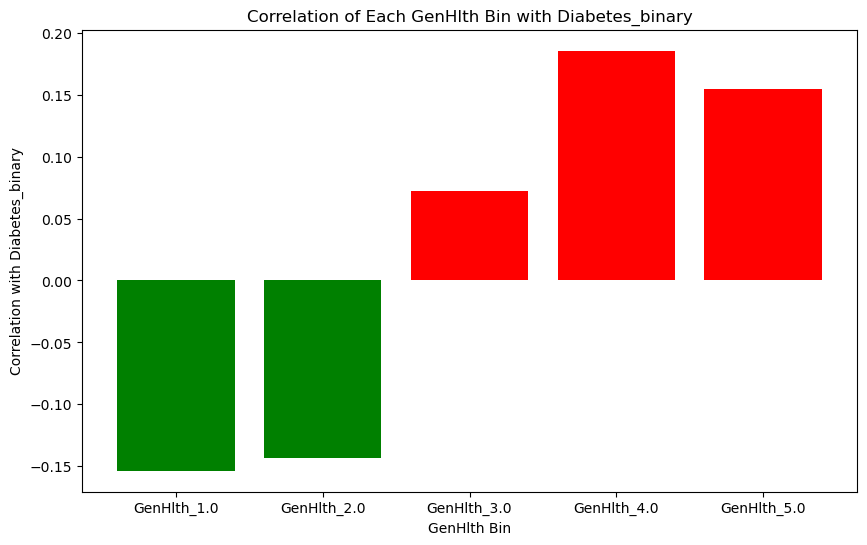

In [16]:
#TODO Correlation of each bin of General Health feature with target variable (exploration for baseline)

# Code for scatterplot by ChatGPT

# Step 1: One-hot encode the 'GenHlth' feature
genhlth_dummies = pd.get_dummies(df_diabetes_binary['GenHlth'], prefix='GenHlth')

# Step 2: Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df_diabetes_binary, genhlth_dummies], axis=1)

# Step 3: Calculate the correlation of each GenHlth bin with the target variable
correlations = df_encoded[genhlth_dummies.columns].corrwith(df_encoded['Diabetes_binary'])

# Convert the correlations to a DataFrame for easier plotting
correlations_df = pd.DataFrame(correlations, columns=['Correlation with Diabetes_binary']).reset_index()
correlations_df.columns = ['GenHlth Bin', 'Correlation with Diabetes_binary']

# Plotting the correlation values with a scatter plot
plt.figure(figsize=(10, 6))
colors = ['green' if corr < 0 else 'red' for corr in correlations_df['Correlation with Diabetes_binary']]
plt.scatter(correlations_df['GenHlth Bin'], correlations_df['Correlation with Diabetes_binary'], color=colors)
plt.title("Correlation of Each GenHlth Bin with Diabetes_binary")
plt.xlabel("GenHlth Bin")
plt.ylabel("Correlation with Diabetes_binary")
plt.grid(True)
plt.show()


# Code for barplot by ChatGPT

# Step 1: One-hot encode the 'GenHlth' feature
genhlth_dummies = pd.get_dummies(df_diabetes_binary['GenHlth'], prefix='GenHlth')

# Step 2: Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df_diabetes_binary, genhlth_dummies], axis=1)

# Step 3: Calculate the correlation of each GenHlth bin with the target variable
correlations = df_encoded[genhlth_dummies.columns].corrwith(df_encoded['Diabetes_binary'])

# Convert the correlations to a DataFrame for easier plotting
correlations_df = pd.DataFrame(correlations, columns=['Correlation with Diabetes_binary']).reset_index()
correlations_df.columns = ['GenHlth Bin', 'Correlation with Diabetes_binary']

# Plotting the correlation values
plt.figure(figsize=(10, 6))
colors = ['green' if corr < 0 else 'red' for corr in correlations_df['Correlation with Diabetes_binary']]
plt.bar(correlations_df['GenHlth Bin'], correlations_df['Correlation with Diabetes_binary'], color=colors)
plt.title("Correlation of Each GenHlth Bin with Diabetes_binary")
plt.xlabel("GenHlth Bin")
plt.ylabel("Correlation with Diabetes_binary")
plt.show()


#TODO Decide which plot to pick & which color (green or red) for positive and negative correlation

